In [24]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
davidson_w_b_geo = gpd.read_file('../data/davidson_race_by_tract/davidson_race_by_tract_clean.geojson')

In [10]:
davidson_w_b_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geoid       164 non-null    object  
 1   name        164 non-null    object  
 2   total_pop   164 non-null    float64 
 3   total_pop_  164 non-null    float64 
 4   white_alon  164 non-null    float64 
 5   white_al_1  164 non-null    float64 
 6   black_afri  164 non-null    float64 
 7   black_af_1  164 non-null    float64 
 8   geometry    164 non-null    geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 11.7+ KB


In [13]:
davidson_w_b_geo['white_pct'] = (davidson_w_b_geo['white_alon'])/(davidson_w_b_geo['total_pop'])
davidson_w_b_geo.head()

,geoid,name,total_pop,total_pop_,white_alon,white_al_1,black_afri,black_af_1,geometry,white_pct
0,01000US,United States,324697795.0,0.0,235377662.0,54551.0,41234642.0,32548.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199...",0.724913
1,04000US47,Tennessee,6709356.0,0.0,5205132.0,4583.0,1124473.0,3575.0,"POLYGON ((-82.22206 36.15696, -82.22214 36.156...",0.775802
2,05000US47037,"Davidson County, TN",687488.0,0.0,440299.0,1694.0,186295.0,1403.0,"MULTIPOLYGON (((-86.98361 36.20957, -86.98398 ...",0.640446
3,14000US47037010103,"Census Tract 101.03, Davidson, TN",2533.0,191.0,2457.0,201.0,7.0,10.0,"POLYGON ((-86.91752 36.33976, -86.91747 36.339...",0.969996
4,14000US47037010104,"Census Tract 101.04, Davidson, TN",2955.0,279.0,2713.0,268.0,167.0,136.0,"POLYGON ((-86.97440 36.24991, -86.97244 36.252...",0.918105


In [14]:
davidson_w_b_geo['white_error_pct'] = (davidson_w_b_geo['white_al_1'])/(davidson_w_b_geo['total_pop'])
davidson_w_b_geo['black_af_pct'] = (davidson_w_b_geo['black_afri'])/(davidson_w_b_geo['total_pop'])
davidson_w_b_geo['black_af_error_pct'] = (davidson_w_b_geo['black_af_1'])/(davidson_w_b_geo['total_pop'])

In [15]:
davidson_w_b_geo.head()

,geoid,name,total_pop,total_pop_,white_alon,white_al_1,black_afri,black_af_1,geometry,white_pct,white_error_pct,black_af_pct,black_af_error_pct
0,01000US,United States,324697795.0,0.0,235377662.0,54551.0,41234642.0,32548.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199...",0.724913,0.000168,0.126994,0.000100
1,04000US47,Tennessee,6709356.0,0.0,5205132.0,4583.0,1124473.0,3575.0,"POLYGON ((-82.22206 36.15696, -82.22214 36.156...",0.775802,0.000683,0.167598,0.000533
2,05000US47037,"Davidson County, TN",687488.0,0.0,440299.0,1694.0,186295.0,1403.0,"MULTIPOLYGON (((-86.98361 36.20957, -86.98398 ...",0.640446,0.002464,0.270979,0.002041
3,14000US47037010103,"Census Tract 101.03, Davidson, TN",2533.0,191.0,2457.0,201.0,7.0,10.0,"POLYGON ((-86.91752 36.33976, -86.91747 36.339...",0.969996,0.079353,0.002764,0.003948
4,14000US47037010104,"Census Tract 101.04, Davidson, TN",2955.0,279.0,2713.0,268.0,167.0,136.0,"POLYGON ((-86.97440 36.24991, -86.97244 36.252...",0.918105,0.090694,0.056514,0.046024


Identifying predominantly black tracts

In [16]:
davidson_pred_black = davidson_w_b_geo[davidson_w_b_geo['black_af_pct'] >= .5]
davidson_pred_black

,geoid,name,total_pop,total_pop_,white_alon,white_al_1,black_afri,black_af_1,geometry,white_pct,white_error_pct,black_af_pct,black_af_error_pct
5,14000US47037010105,"Census Tract 101.05, Davidson, TN",4435.0,328.0,967.0,174.0,3317.0,354.0,"POLYGON ((-86.89144 36.26205, -86.89100 36.262...",0.218038,0.039233,0.747914,0.079820
6,14000US47037010106,"Census Tract 101.06, Davidson, TN",3397.0,288.0,1020.0,184.0,2192.0,207.0,"POLYGON ((-86.83089 36.26570, -86.83016 36.265...",0.300265,0.054165,0.645275,0.060936
23,14000US47037010903,"Census Tract 109.03, Davidson, TN",5863.0,648.0,503.0,195.0,4741.0,539.0,"POLYGON ((-86.78518 36.23812, -86.78502 36.239...",0.085792,0.033259,0.808630,0.091932
24,14000US47037010904,"Census Tract 109.04, Davidson, TN",3213.0,236.0,564.0,257.0,2624.0,303.0,"POLYGON ((-86.78635 36.23788, -86.78634 36.237...",0.175537,0.079988,0.816682,0.094304
25,14000US47037011001,"Census Tract 110.01, Davidson, TN",6746.0,726.0,2547.0,645.0,3561.0,650.0,"POLYGON ((-86.77646 36.20665, -86.77641 36.207...",0.377557,0.095612,0.527868,0.096353
30,14000US47037011400,"Census Tract 114, Davidson, TN",4617.0,654.0,1944.0,354.0,2478.0,508.0,"POLYGON ((-86.74899 36.19845, -86.74874 36.198...",0.421053,0.076673,0.536712,0.110028
34,14000US47037011800,"Census Tract 118, Davidson, TN",2700.0,409.0,880.0,334.0,1744.0,420.0,"POLYGON ((-86.77242 36.17674, -86.77234 36.176...",0.325926,0.123704,0.645926,0.155556
35,14000US47037011900,"Census Tract 119, Davidson, TN",2530.0,322.0,1098.0,218.0,1323.0,256.0,"POLYGON ((-86.77081 36.17450, -86.77000 36.174...",0.433992,0.086166,0.522925,0.101186
38,14000US47037012600,"Census Tract 126, Davidson, TN",2205.0,338.0,841.0,179.0,1246.0,248.0,"POLYGON ((-86.77627 36.19295, -86.77623 36.193...",0.381406,0.081179,0.565079,0.112472
39,14000US47037012701,"Census Tract 127.01, Davidson, TN",6072.0,664.0,689.0,358.0,5243.0,783.0,"POLYGON ((-86.82143 36.22305, -86.82113 36.223...",0.113472,0.058959,0.863472,0.128953


In [20]:
davidson_pred_black.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 25 entries, 5 to 158
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   geoid               25 non-null     object  
 1   name                25 non-null     object  
 2   total_pop           25 non-null     float64 
 3   total_pop_          25 non-null     float64 
 4   white_alon          25 non-null     float64 
 5   white_al_1          25 non-null     float64 
 6   black_afri          25 non-null     float64 
 7   black_af_1          25 non-null     float64 
 8   geometry            25 non-null     geometry
 9   white_pct           25 non-null     float64 
 10  white_error_pct     25 non-null     float64 
 11  black_af_pct        25 non-null     float64 
 12  black_af_error_pct  25 non-null     float64 
dtypes: float64(10), geometry(1), object(2)
memory usage: 2.7+ KB


Finding the centroid of 1 tract to use in the Google API.
1. Get the polygon of the first census tract.
2. Get the centroid
3. Look up the mile radius and convert to meters. 

May look into making the centroid it's own column in the geodataframe. 

In [26]:
ct_10105 = davidson_pred_black.loc[davidson_pred_black['name'] == 'Census Tract 101.05, Davidson, TN']
ct_10105.shape

(1, 13)

<AxesSubplot:>

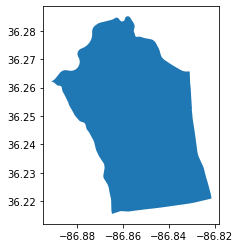

In [28]:
ct_10105.plot()

In [29]:
ct_10105.geometry.centroid

C:\Users\16159\AppData\Local\Temp/ipykernel_17340/2988246935.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ct_10105.geometry.centroid


5    POINT (-86.85388 36.24885)
dtype: geometry

Seeing if I can get the area from the shape file.

In [51]:
davidson_geo_shape = gpd.read_file('../data/davidson_race_by_tract/davidson_race_by_tract_clean.geojson/davidson_race_by_tract_clean.shp')

In [52]:
davidson_geo_shape

,geoid,name,total_pop,total_pop_,white_alon,white_al_1,black_afri,black_af_1,geometry
0,01000US,United States,324697795.0,0.0,235377662.0,54551.0,41234642.0,32548.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,04000US47,Tennessee,6709356.0,0.0,5205132.0,4583.0,1124473.0,3575.0,"POLYGON ((-82.22206 36.15696, -82.22214 36.156..."
2,05000US47037,"Davidson County, TN",687488.0,0.0,440299.0,1694.0,186295.0,1403.0,"MULTIPOLYGON (((-86.98361 36.20957, -86.98398 ..."
3,14000US47037010103,"Census Tract 101.03, Davidson, TN",2533.0,191.0,2457.0,201.0,7.0,10.0,"POLYGON ((-86.91752 36.33976, -86.91747 36.339..."
4,14000US47037010104,"Census Tract 101.04, Davidson, TN",2955.0,279.0,2713.0,268.0,167.0,136.0,"POLYGON ((-86.97440 36.24991, -86.97244 36.252..."
...,...,...,...,...,...,...,...,...,...
159,14000US47037019400,"Census Tract 194, Davidson, TN",5810.0,569.0,3891.0,444.0,1578.0,308.0,"POLYGON ((-86.80102 36.17745, -86.80100 36.177..."
160,14000US47037019500,"Census Tract 195, Davidson, TN",7956.0,795.0,6388.0,698.0,849.0,285.0,"POLYGON ((-86.80272 36.15248, -86.80084 36.153..."
161,14000US47037019600,"Census Tract 196, Davidson, TN",3843.0,480.0,2768.0,478.0,545.0,411.0,"POLYGON ((-86.76398 36.15376, -86.76368 36.153..."
162,14000US47037980100,"Census Tract 9801, Davidson, TN",0.0,12.0,0.0,12.0,0.0,12.0,"POLYGON ((-86.70035 36.11833, -86.70019 36.118..."


In [53]:
tost = davidson_geo_shape.copy()
tost= tost.to_crs({'init': 'epsg:3857'})
print(tost.crs)
tost.head(2)

C:\Users\16159\anaconda3\envs\geospatial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


+init=epsg:3857 +type=crs


,geoid,name,total_pop,total_pop_,white_alon,white_al_1,black_afri,black_af_1,geometry
0,01000US,United States,324697795.0,0.0,235377662.0,54551.0,41234642.0,32548.0,"MULTIPOLYGON (((-18726751.729 -1635772.343, -1..."
1,04000US47,Tennessee,6709356.0,0.0,5205132.0,4583.0,1124473.0,3575.0,"POLYGON ((-9152918.296 4322240.375, -9152927.3..."


In [54]:
tost["area"] = tost['geometry'].area/ 10**6
tost.head(2)

,geoid,name,total_pop,total_pop_,white_alon,white_al_1,black_afri,black_af_1,geometry,area
0,01000US,United States,324697795.0,0.0,235377662.0,54551.0,41234642.0,32548.0,"MULTIPOLYGON (((-18726751.729 -1635772.343, -1...",2.285092e+07
1,04000US47,Tennessee,6709356.0,0.0,5205132.0,4583.0,1124473.0,3575.0,"POLYGON ((-9152918.296 4322240.375, -9152927.3...",1.664790e+05


In [55]:
tost= tost.to_crs({'init': 'epsg:32633'})
tost["area"] = tost['geometry'].area/ 10**6
tost.head(2)

C:\Users\16159\anaconda3\envs\geospatial\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,geoid,name,total_pop,total_pop_,white_alon,white_al_1,black_afri,black_af_1,geometry,area
0,01000US,United States,324697795.0,0.0,235377662.0,54551.0,41234642.0,32548.0,"MULTIPOLYGON (((847639.041 -18386476.020, 8449...",1.899719e+07
1,04000US47,Tennessee,6709356.0,0.0,5205132.0,4583.0,1124473.0,3575.0,"POLYGON ((-6520993.319 11081353.580, -6520997....",2.939303e+05


In [59]:
print(tost.loc[tost['name'] == 'Census Tract 101.05, Davidson, TN'])

                geoid                               name  total_pop  \
5  14000US47037010105  Census Tract 101.05, Davidson, TN     4435.0   

   total_pop_  white_alon  white_al_1  black_afri  black_af_1  \
5       328.0       967.0       174.0      3317.0       354.0   

                                            geometry       area  
5  POLYGON ((-6315108.376 11740166.971, -6315093....  74.652902  
